### i) Abstracto
**En esta sección, proporciona un resumen conciso del objetivo del análisis, los métodos utilizados y los principales hallazgos:**
    Este análisis explora las dinámicas del mercado inmobiliario en la Region metropolitana de Chile, centrándose en cómo diversos factores afectan el precio de las propiedades. Utilizando un dataset de propiedades listadas, realizamos un Análisis Exploratorio de Datos (EDA) para investigar la relación entre el precio y variables como ubicación, tamaño de la propiedad, número de dormitorios y baños, y el corredor de bienes raíces que las lista. Nuestros hallazgos indican que la ubicación y el tamaño de la propiedad son determinantes clave del precio, mientras que el número de estacionamientos y la elección del corredor de bienes raíces también juegan un rol importante. Estos insights pueden ayudar a vendedores y compradores a tomar decisiones informadas en el mercado inmobiliario.


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/tiripitipi/precios-casas-unadas-rmchile/main/2023-03-08%20Precios%20Casas%20RM.csv'

In [3]:
df = pd.read_csv(url, index_col=0)

In [4]:
df.head()

,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
Price_CLP,,,,,,,,,,,
409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades


In [5]:
df.index=df['id']

In [6]:
df=df.drop('id',axis='columns')

In [7]:
df

,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,Realtor
id,,,,,,,,,,
11700213,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,NaN
10894299,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,Legales y Propiedades SpA
10257635,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,Propiedadesrs
9232092,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,Patricio Gajardo propiedades
7085397,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,Patricio Gajardo propiedades
...,...,...,...,...,...,...,...,...,...,...
4708915,70000,3102491,LasCondes,CalleSanJosédeLaSierra,5,5.0,600.0,1800.0,5.0,Propiedades Viña Limitada ®
6641660,6800,301385,Peñalolén,PasajeMarNegro,4,2.0,124.0,200.0,1.0,NaN
6032811,105000,4653736,LasCondes,CaminoLasFlores/CaminoPiedraRoja,5,7.0,460.0,4925.0,8.0,Tsi Property


### ii) Análisis de los datos faltantes/nulos:

**Primero, se obtiene un recuento de los valores faltantes para cada columna:**

In [8]:
df.isnull().sum()

Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms            0
Baths           65
Built Area     246
Total Area     208
Parking       2290
Realtor        595
dtype: int64

**Para entender mejor la magnitud de los datos faltantes, es útil calcular el porcentaje de datos faltantes para cada columna:**

In [9]:
porcentaje_faltantes = df.isnull().mean() * 100
print(porcentaje_faltantes)

Price_UF       0.000000
Price_USD      0.000000
Comuna         0.000000
Ubicacion      0.000000
Dorms          0.000000
Baths          0.835583
Built Area     3.162360
Total Area     2.673866
Parking       29.438231
Realtor        7.648798
dtype: float64


**Se utiliza un mapa de calor para ver los patrones de datos faltantes.**

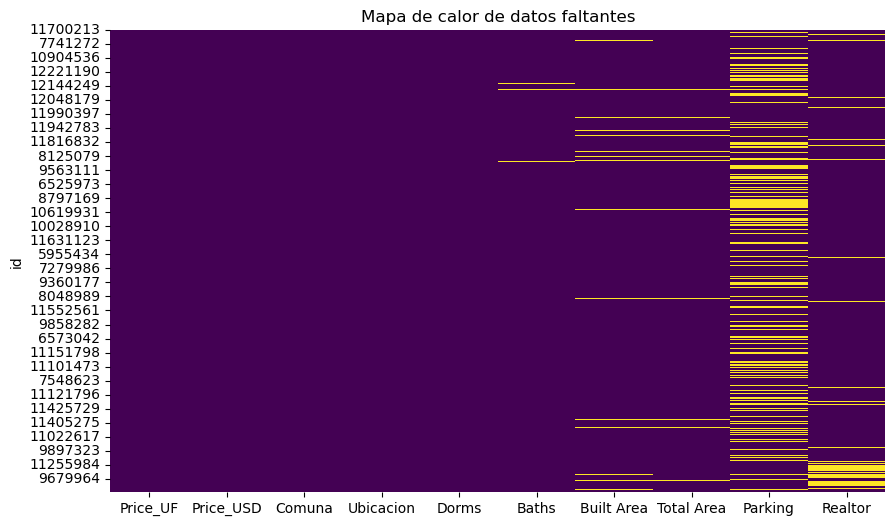

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de datos faltantes')
plt.show()

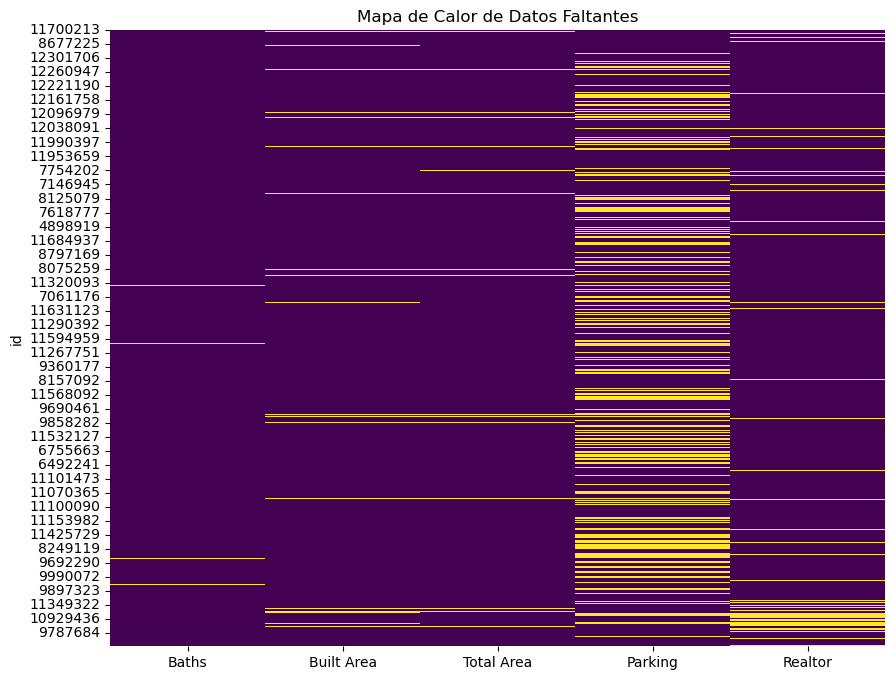

In [11]:
cols_of_interest = ['Baths', 'Built Area', 'Total Area', 'Parking', 'Realtor']
df_selected = df[cols_of_interest]

plt.figure(figsize=(10, 8))  
sns.heatmap(df_selected.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()


**Imputación por Regresión Lineal con "Total Area"**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Filtrando las filas donde ambas 'Parking' y 'Total Area' son no nulas
data_with_no_na = df.dropna(subset=['Parking', 'Total Area'])

# Separando los datos en características (X) y objetivo (y)
X = data_with_no_na[['Total Area']]
y = data_with_no_na['Parking']

# Creando y entrenando el modelo
model = LinearRegression()
model.fit(X, y)

# Prediciendo los valores faltantes de 'Parking' usando el modelo
# Primero, selecciona las filas donde 'Parking' es NaN pero 'Total Area' no lo es
missing_parking = df[df['Parking'].isnull() & df['Total Area'].notnull()]

# Realiza predicciones
predicted_parking_values = model.predict(missing_parking[['Total Area']])

# Reemplaza los valores faltantes con las predicciones
# Asegúrate de redondear las predicciones si 'Parking' debe ser un número entero
df.loc[missing_parking.index, 'Parking'] = np.round(predicted_parking_values)

print(df['Parking'].isnull().sum())  # Verifica nuevamente los valores faltantes


76


In [13]:
df['Parking'] = df.groupby('Comuna')['Parking'].transform(lambda x: x.fillna(x.median()))


**Imputacion del resto de datos faltantes/nulos por Comuna**

In [14]:
print(df['Parking'].isnull().sum())

0


**Crear una categoría "Desconocido" para el corredor de bienes raices**

In [15]:
# Reemplazar valores NaN en la columna 'Realtor' con la categoría 'Desconocido'
df['Realtor'] = df['Realtor'].fillna('Desconocido')

# Verificar que no haya más valores NaN en 'Realtor'
print(df['Realtor'].isnull().sum())

0


**Imputación de las columnas "baths", "built area", y "total area"**

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Suponiendo que df es tu DataFrame
# Primero, creamos el imputador, eligiendo 'median' como la estrategia de imputación
imputer = SimpleImputer(strategy='median')

# Ahora, aplicamos el imputador a las columnas específicas
# Asegúrate de seleccionar solo las columnas que deseas imputar
columns_to_impute = ['Baths', 'Built Area', 'Total Area']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verificamos el resultado
print(df[columns_to_impute].head())


          Baths  Built Area  Total Area
id                                     
11700213    4.0       384.0       732.0
10894299    1.0       112.0       145.0
10257635    1.0        59.0       243.0
9232092     1.0       103.0        73.0
7085397     1.0        57.0        67.0


In [17]:
porcentaje_faltantes = df.isnull().mean() * 100
print(porcentaje_faltantes)

Price_UF      0.0
Price_USD     0.0
Comuna        0.0
Ubicacion     0.0
Dorms         0.0
Baths         0.0
Built Area    0.0
Total Area    0.0
Parking       0.0
Realtor       0.0
dtype: float64


### iii) Verificación de Consistencia de Datos

**Revisamos los tipos de datos**

In [18]:
df.dtypes

Price_UF        int64
Price_USD       int64
Comuna         object
Ubicacion      object
Dorms           int64
Baths         float64
Built Area    float64
Total Area    float64
Parking       float64
Realtor        object
dtype: object

**Estadísticas descriptivas**

In [19]:
df.describe(include='all')

,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,Realtor
count,7779.000000,7.779000e+03,7779,7779,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779
unique,NaN,NaN,51,6620,NaN,NaN,NaN,NaN,NaN,279
top,NaN,NaN,PuenteAlto,Maipú,NaN,NaN,NaN,NaN,NaN,Unne
freq,NaN,NaN,814,45,NaN,NaN,NaN,NaN,NaN,1013
mean,10234.571153,4.536091e+05,NaN,NaN,3.994087,2.648284,226.700476,791.932254,2.981874,NaN
std,10870.491584,4.817945e+05,NaN,NaN,1.622821,1.460181,1650.263956,8929.574148,14.909466,NaN
min,0.000000,3.000000e+00,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,3372.000000,1.494400e+05,NaN,NaN,3.000000,2.000000,87.000000,130.000000,2.000000,NaN
50%,5760.000000,2.552930e+05,NaN,NaN,4.000000,2.000000,128.000000,210.000000,3.000000,NaN
75%,13800.000000,6.116340e+05,NaN,NaN,5.000000,3.000000,200.000000,430.000000,3.000000,NaN


**Revisar unicidad y duplicados**

In [20]:
df.drop_duplicates(inplace=True)

### iv) Preguntas/hipótesis
**Lista las preguntas o hipótesis que buscas responder o explorar con tu análisis. Por ejemplo:**

1. ¿Influye la ubicación en el precio de las casas?
2. ¿Cuál es la relación entre el tamaño de la propiedad y su precio?
3. ¿Cómo afectan el número de dormitorios y baños al precio de las propiedades?
4. ¿Cuál es la importancia de los estacionamientos en el precio final de una casa?
5. ¿Cómo varían los precios en función de la moneda utilizada para la transacción?
6. ¿Influye el corredor de bienes raíces en el precio de venta de una propiedad?


### 1. ¿Influye la ubicación en el precio de las casas?

In [21]:
# Agrupamos los datos por comuna y calculamos el precio medio en USD para cada una
precios_medios_por_comuna = df.groupby('Comuna')['Price_USD'].mean().sort_values(ascending=False)

# Para mejor visualización, podemos limitarnos a las top 10 comunas más caras
top_comunas = precios_medios_por_comuna.head(10)


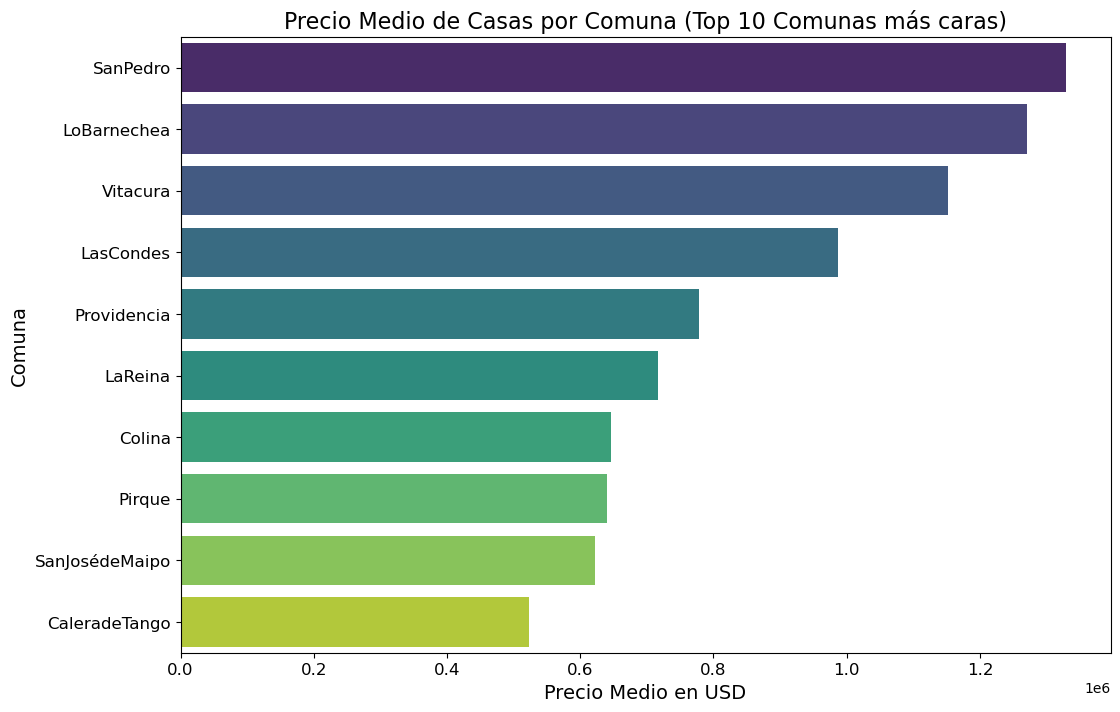

In [22]:
plt.figure(figsize=(12, 8))  # Configuramos el tamaño del gráfico
sns.barplot(x=top_comunas.values, y=top_comunas.index, palette="viridis")  # Usamos Seaborn para un estilo mejorado

# Añadimos títulos y etiquetas para hacer el gráfico más informativo
plt.title('Precio Medio de Casas por Comuna (Top 10 Comunas más caras)', fontsize=16)
plt.xlabel('Precio Medio en USD', fontsize=14)
plt.ylabel('Comuna', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostramos el gráfico
plt.show()


Este gráfico te muestra las 10 comunas con el precio medio más alto, permitiéndote visualizar cómo varía el precio medio de las casas en función de la ubicación. Se puede apreciar que las comunas con precio medio mas alto son las que son conocidas por tener habitantes con mayor poder adquisitivo y las comunas mas rurales de estas ultimas el precio puede deberse al tamaño de la propiedad.

### 2. ¿Cuál es la relación entre el tamaño de la propiedad y su precio?

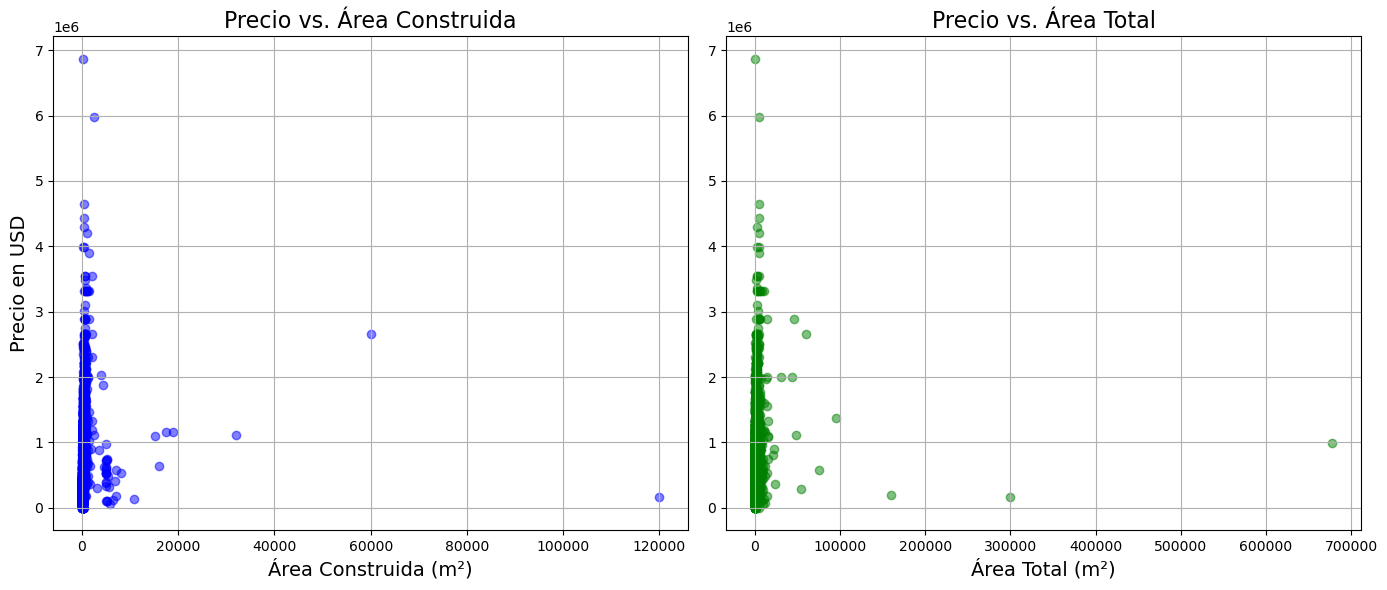

In [23]:

plt.figure(figsize=(14, 6))

# Gráfico de dispersión para Price_UF vs. Built Area
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.scatter(df['Built Area'], df['Price_USD'], alpha=0.5, color='blue')
plt.title('Precio vs. Área Construida', fontsize=16)
plt.xlabel('Área Construida (m²)', fontsize=14)
plt.ylabel('Precio en USD', fontsize=14)
plt.grid(True)

# Gráfico de dispersión para Price_UF vs. Total Area
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.scatter(df['Total Area'], df['Price_USD'], alpha=0.5, color='green')
plt.title('Precio vs. Área Total', fontsize=16)
plt.xlabel('Área Total (m²)', fontsize=14)
plt.grid(True)

# Ajustar automáticamente el layout de los subplots
plt.tight_layout()

plt.show()


Existen valores extremos (outliers) que afectan la visualización y comprensión de los datos.
Vamos a utilizar el filtrado basado en percentiles para excluir los valores extremos tanto para el "Built Area" como para el "Total Area", y luego volveremos a crear los gráficos de dispersión.

In [24]:
# Calcular percentiles para 'Built Area' y 'Total Area'
percentil_95_built = df['Built Area'].quantile(0.95)
percentil_95_total = df['Total Area'].quantile(0.95)

# Filtrar el dataframe para excluir propiedades con áreas en los percentiles superiores
df_filtrado = df[(df['Built Area'] <= percentil_95_built) & (df['Total Area'] <= percentil_95_total)]


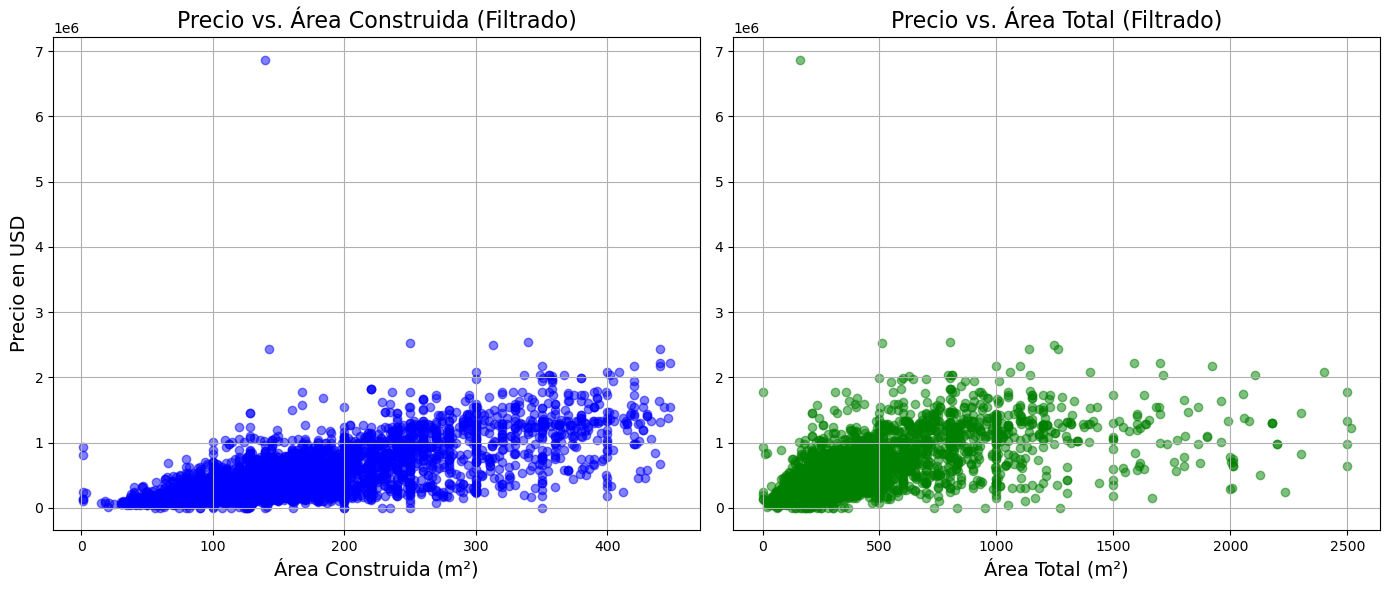

In [25]:
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para Price_UF vs. Built Area (datos filtrados)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.scatter(df_filtrado['Built Area'], df_filtrado['Price_USD'], alpha=0.5, color='blue')
plt.title('Precio vs. Área Construida (Filtrado)', fontsize=16)
plt.xlabel('Área Construida (m²)', fontsize=14)
plt.ylabel('Precio en USD', fontsize=14)
plt.grid(True)

# Gráfico de dispersión para Price_UF vs. Total Area (datos filtrados)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.scatter(df_filtrado['Total Area'], df_filtrado['Price_USD'], alpha=0.5, color='green')
plt.title('Precio vs. Área Total (Filtrado)', fontsize=16)
plt.xlabel('Área Total (m²)', fontsize=14)
plt.grid(True)

# Ajustar automáticamente el layout de los subplots
plt.tight_layout()

plt.show()


Para solucionar el problema de los valores excesivos en los precios, que también distorsionan la visualización, podemos aplicar un enfoque similar al que usamos para filtrar los valores extremos de las áreas de las propiedades. En este caso, aplicaremos el filtrado basado en percentiles al precio, excluyendo aquellos precios que se encuentren en los percentiles más altos. Esto nos permitirá obtener una mejor visualización de la mayoría de los datos, excluyendo los valores extremadamente altos que pueden afectar la interpretación de los gráficos.

In [26]:
# Calculamos el percentil 95 para 'Price_USD'
percentil_95_price = df['Price_USD'].quantile(0.95)

# Filtramos el dataframe para excluir propiedades con precios en el percentil superior
df_filtrado_completo = df[(df['Built Area'] <= percentil_95_built) &
                          (df['Total Area'] <= percentil_95_total) &
                          (df['Price_USD'] <= percentil_95_price)]


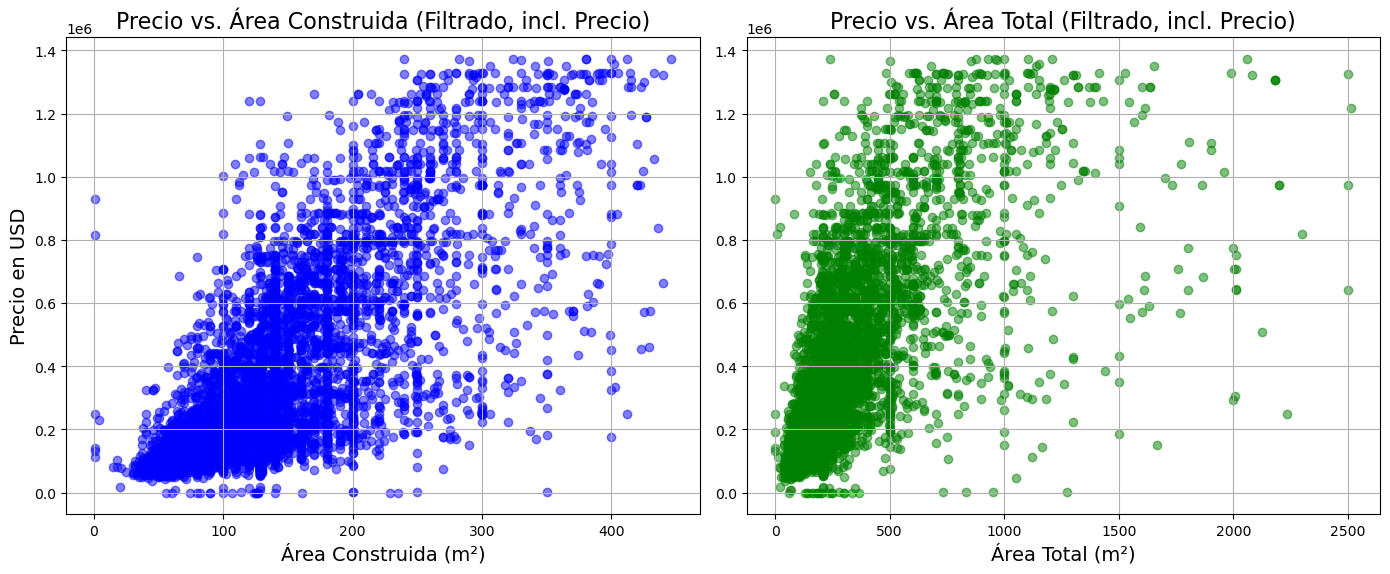

In [27]:
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para Price_USD vs. Built Area (datos filtrados, incluyendo precio)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.scatter(df_filtrado_completo['Built Area'], df_filtrado_completo['Price_USD'], alpha=0.5, color='blue')
plt.title('Precio vs. Área Construida (Filtrado, incl. Precio)', fontsize=16)
plt.xlabel('Área Construida (m²)', fontsize=14)
plt.ylabel('Precio en USD', fontsize=14)
plt.grid(True)

# Gráfico de dispersión para Price_USD vs. Total Area (datos filtrados, incluyendo precio)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.scatter(df_filtrado_completo['Total Area'], df_filtrado_completo['Price_USD'], alpha=0.5, color='green')
plt.title('Precio vs. Área Total (Filtrado, incl. Precio)', fontsize=16)
plt.xlabel('Área Total (m²)', fontsize=14)
plt.grid(True)

# Ajustar automáticamente el layout de los subplots
plt.tight_layout()

plt.show()


Para obtener la correlación entre las variables de interés en los gráficos de dispersión calculamos el coeficiente de correlación de Pearson.

In [28]:
# Calcular la correlación de Pearson para Price_USD vs. Built Area
corr_price_built_area = df_filtrado_completo['Price_USD'].corr(df_filtrado_completo['Built Area'])

# Calcular la correlación de Pearson para Price_UF vs. Total Area
corr_price_total_area = df_filtrado_completo['Price_USD'].corr(df_filtrado_completo['Total Area'])

print(f"Correlación entre Precio (USD) y Área Construida: {corr_price_built_area:.3f}")
print(f"Correlación entre Precio (USD) y Área Total: {corr_price_total_area:.3f}")


Correlación entre Precio (USD) y Área Construida: 0.756
Correlación entre Precio (USD) y Área Total: 0.703


Ambas correlaciones son positivas y relativamente fuertes, lo que indica que tanto el área construida como el área total son predictores significativos del precio de las casas en este conjunto de datos. Sin embargo, el área construida tiene una correlación ligeramente mayor con el precio que el área total, lo que podría sugerir que los compradores valoran más el espacio habitable interior que el tamaño total del terreno.

### 3. ¿Cómo afectan el número de dormitorios y baños al precio de las propiedades?

Usaremos gráficos de caja (boxplots) y gráficos de puntos (scatter plots) para analizar cómo varían los precios con el número de dormitorios y baños. Los gráficos de caja nos permiten ver la distribución de los precios para cada cantidad de dormitorios y baños, mientras que los gráficos de puntos pueden ayudar a identificar tendencias más específicas y outliers.

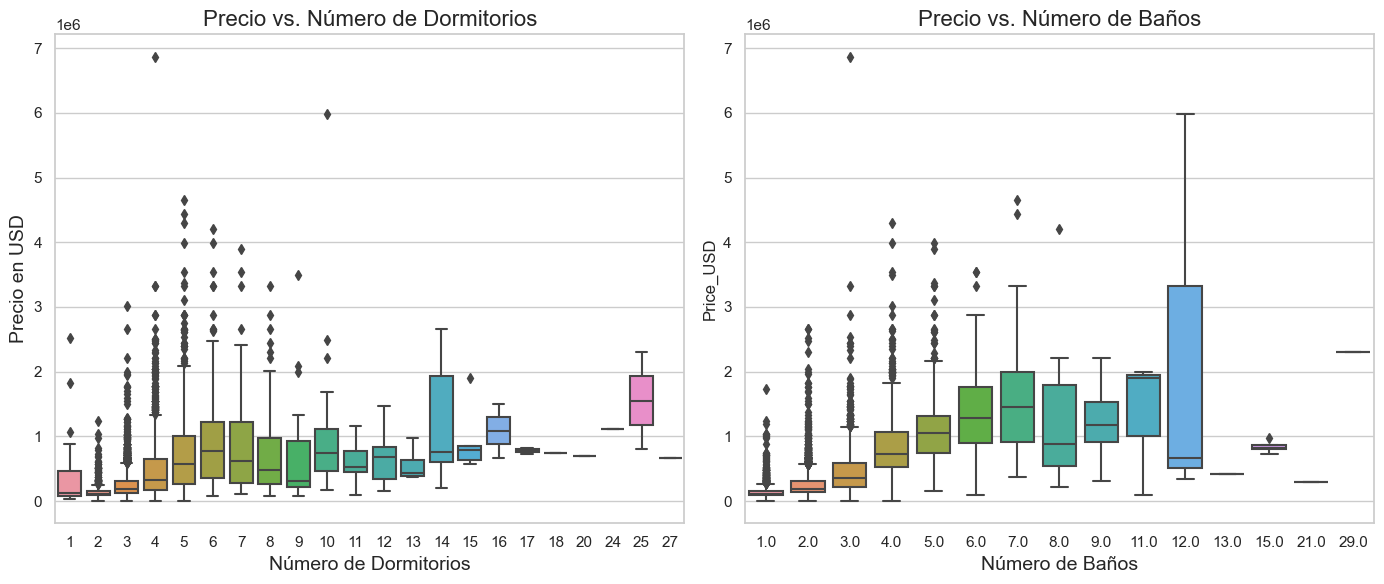

In [29]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Gráfico de caja para el número de dormitorios vs. precio
plt.subplot(1, 2, 1)
sns.boxplot(x='Dorms', y='Price_USD', data=df)
plt.title('Precio vs. Número de Dormitorios', fontsize=16)
plt.xlabel('Número de Dormitorios', fontsize=14)
plt.ylabel('Precio en USD', fontsize=14)

# Gráfico de caja para el número de baños vs. precio
plt.subplot(1, 2, 2)
sns.boxplot(x='Baths', y='Price_USD', data=df)
plt.title('Precio vs. Número de Baños', fontsize=16)
plt.xlabel('Número de Baños', fontsize=14)

plt.tight_layout()
plt.show()


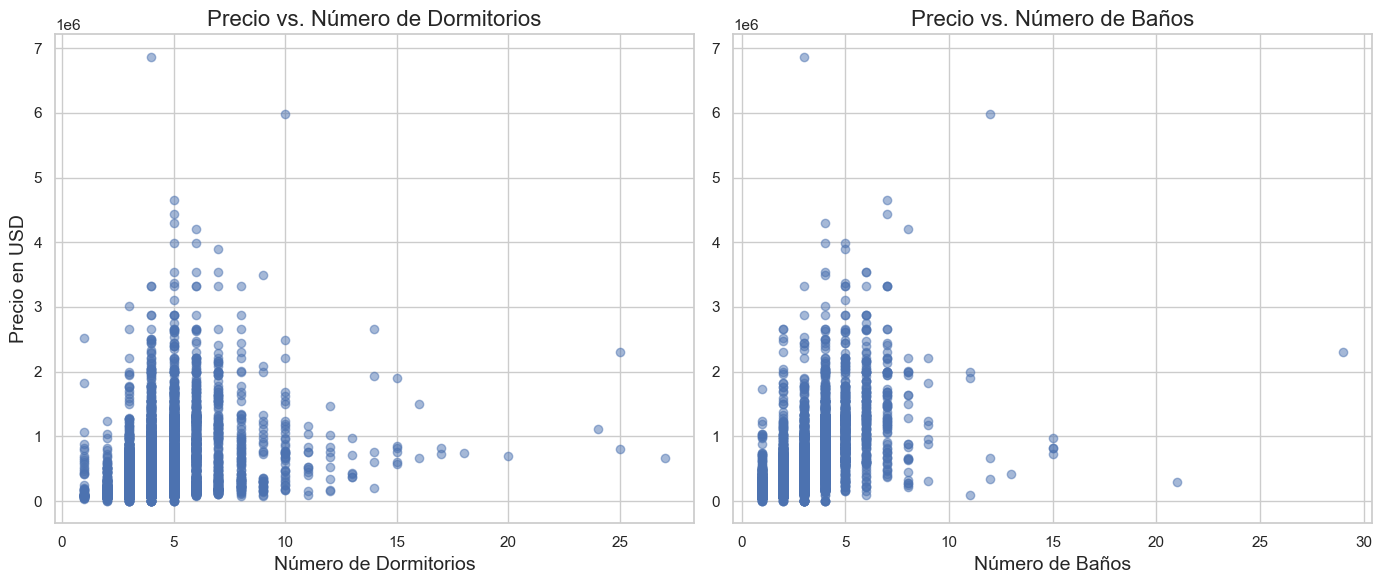

In [30]:
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para el número de dormitorios vs. precio
plt.subplot(1, 2, 1)
plt.scatter(df['Dorms'], df['Price_USD'], alpha=0.5)
plt.title('Precio vs. Número de Dormitorios', fontsize=16)
plt.xlabel('Número de Dormitorios', fontsize=14)
plt.ylabel('Precio en USD', fontsize=14)

# Gráfico de dispersión para el número de baños vs. precio
plt.subplot(1, 2, 2)
plt.scatter(df['Baths'], df['Price_USD'], alpha=0.5)
plt.title('Precio vs. Número de Baños', fontsize=16)
plt.xlabel('Número de Baños', fontsize=14)

plt.tight_layout()
plt.show()


Realizaremos un filtrado basado en IQR para el precio y un filtrado basado en rangos razonables para Dorms y Baths

In [31]:
Q1_price = df['Price_USD'].quantile(0.25)
Q3_price = df['Price_USD'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Definir límites superior e inferior
lower_limit_price = Q1_price - 1.5 * IQR_price
upper_limit_price = Q3_price + 1.5 * IQR_price

# Filtrar el DataFrame para excluir valores extremos en el precio
df_filtered = df[(df['Price_USD'] >= lower_limit_price) & (df['Price_USD'] <= upper_limit_price)]


In [32]:
# Asumiendo que quieres considerar propiedades con hasta 6 dormitorios y 5 baños como máximo
df_filtered = df_filtered[(df_filtered['Dorms'] <= 6) & (df_filtered['Baths'] <= 5)]


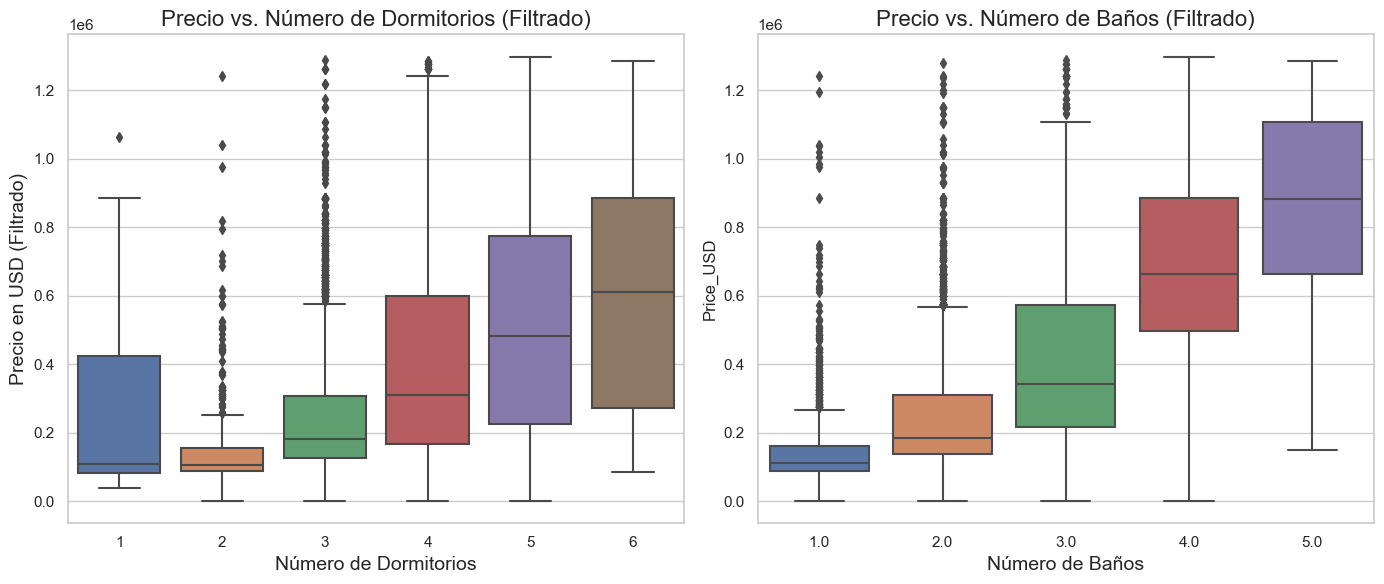

In [33]:
plt.figure(figsize=(14, 6))

# Gráfico de caja para el número de dormitorios vs. precio (filtrado)
plt.subplot(1, 2, 1)
sns.boxplot(x='Dorms', y='Price_USD', data=df_filtered)
plt.title('Precio vs. Número de Dormitorios (Filtrado)', fontsize=16)
plt.xlabel('Número de Dormitorios', fontsize=14)
plt.ylabel('Precio en USD (Filtrado)', fontsize=14)

# Gráfico de caja para el número de baños vs. precio (filtrado)
plt.subplot(1, 2, 2)
sns.boxplot(x='Baths', y='Price_USD', data=df_filtered)
plt.title('Precio vs. Número de Baños (Filtrado)', fontsize=16)
plt.xlabel('Número de Baños', fontsize=14)

plt.tight_layout()
plt.show()


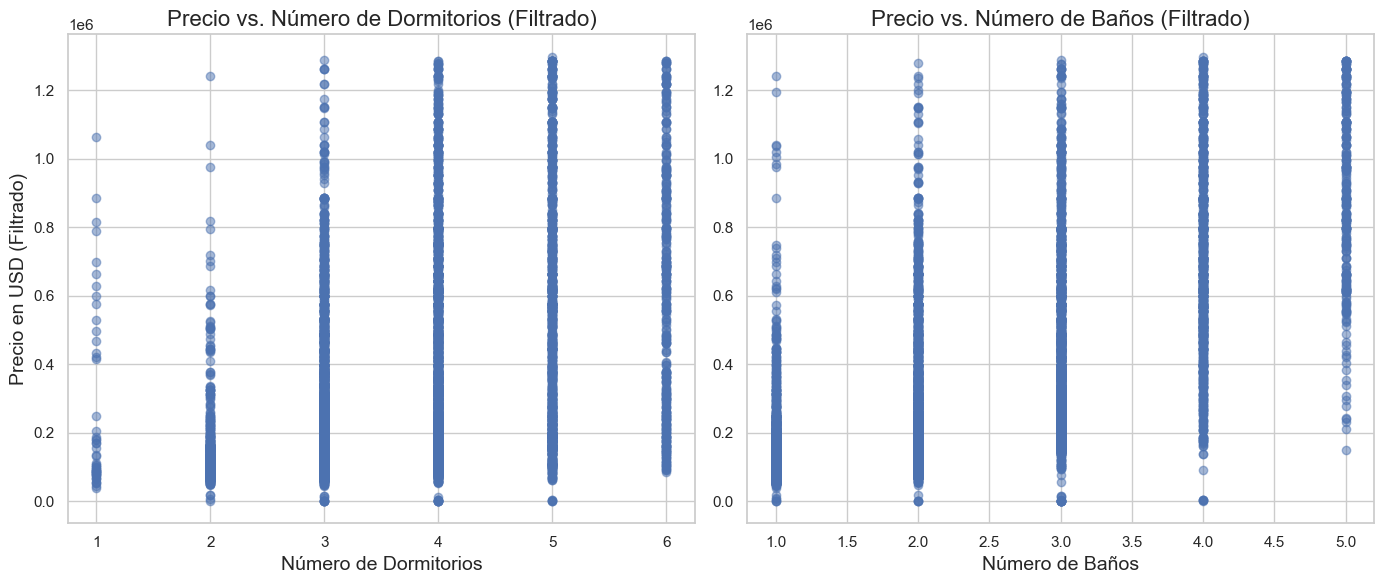

In [34]:
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para el número de dormitorios vs. precio (filtrado)
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['Dorms'], df_filtered['Price_USD'], alpha=0.5)
plt.title('Precio vs. Número de Dormitorios (Filtrado)', fontsize=16)
plt.xlabel('Número de Dormitorios', fontsize=14)
plt.ylabel('Precio en USD (Filtrado)', fontsize=14)

# Gráfico de dispersión para el número de baños vs. precio (filtrado)
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['Baths'], df_filtered['Price_USD'], alpha=0.5)
plt.title('Precio vs. Número de Baños (Filtrado)', fontsize=16)
plt.xlabel('Número de Baños', fontsize=14)

plt.tight_layout()
plt.show()


Los precios tienden a aumentar con el número de dormitorios o baños, esto sugeriría que estas características son factores importantes que contribuyen al valor de una propiedad en tu conjunto de datos.

### 4. ¿Cuál es la importancia de los estacionamientos en el precio final de una casa?

 Utilizaremos gráficos de caja (boxplots) para comparar la distribución de precios para diferentes números de estacionamientos. 

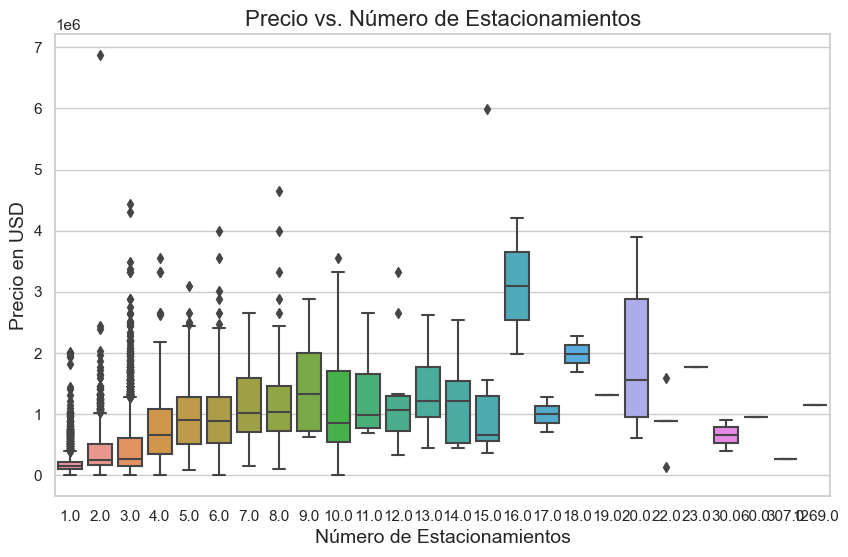

In [35]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parking', y='Price_USD', data=df)

plt.title('Precio vs. Número de Estacionamientos', fontsize=16)
plt.xlabel('Número de Estacionamientos', fontsize=14)
plt.ylabel('Precio en USD', fontsize=14)
plt.show()


Filtraremos estos resultados

In [36]:
# Asumir que la mayoría de casas tienen entre 0 y 5 estacionamientos
df_filtered = df_filtered[df_filtered['Parking'].between(0, 5)]


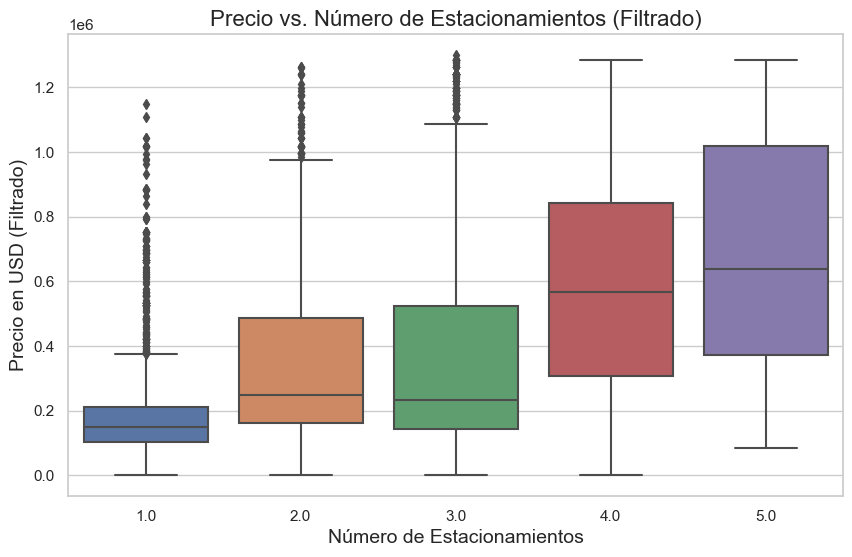

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parking', y='Price_USD', data=df_filtered)

plt.title('Precio vs. Número de Estacionamientos (Filtrado)', fontsize=16)
plt.xlabel('Número de Estacionamientos', fontsize=14)
plt.ylabel('Precio en USD (Filtrado)', fontsize=14)
plt.show()


Una posible conclusión podría ser que las casas con más estacionamientos tienden a tener precios más altos, lo que sugiere que los estacionamientos son una característica valorada en el mercado inmobiliario de las casas.

### 5. ¿Cómo varían los precios en función de la moneda utilizada para la transacción?

Visualizaremos las distribuciones de precios para **UF** y **USD** utilizando gráficos de densidad, lo que puede ayudar a identificar diferencias en la variabilidad y en la escala de precios entre las monedas.



C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


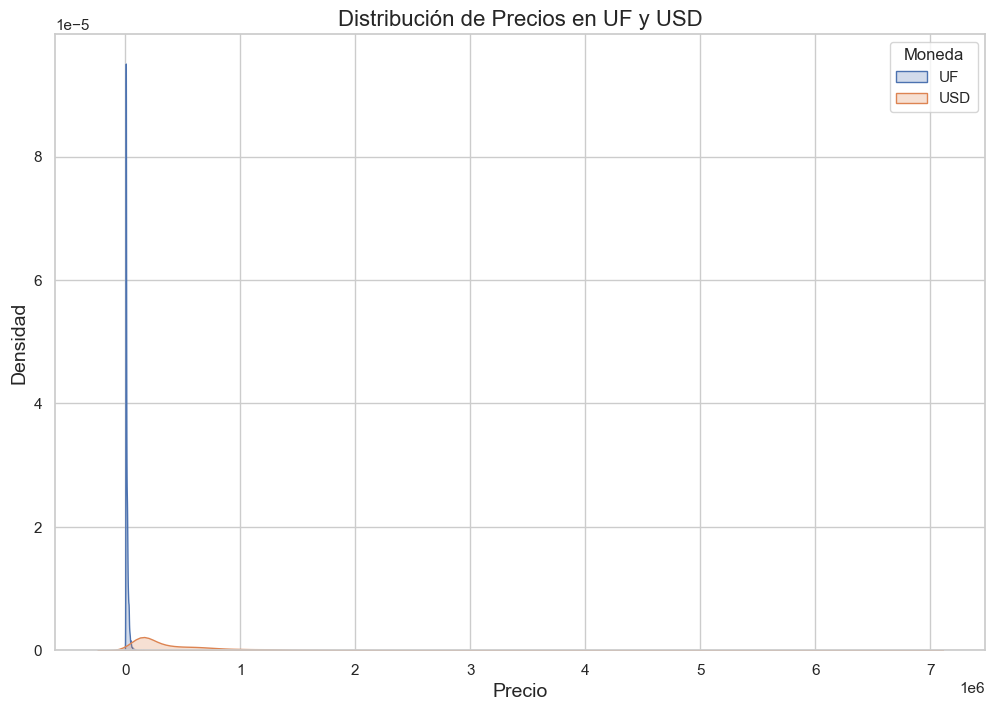

In [38]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Gráfico de densidad para Price_UF con fill=True
sns.kdeplot(df['Price_UF'], label='UF', fill=True)

# Gráfico de densidad para Price_USD con fill=True
sns.kdeplot(df['Price_USD'], label='USD', fill=True)

# Añadir títulos y etiquetas
plt.title('Distribución de Precios en UF y USD', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend(title='Moneda')

plt.show()


 Hay una gran diferencia en las escalas de valores entre estas dos monedas.  Esto es normal debido a la naturaleza de las monedas y cómo se comparan entre sí.
 Para propósitos de visualización y análisis comparativo realizaremos los dos graficos separados pero alineados.

C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KAGA6\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


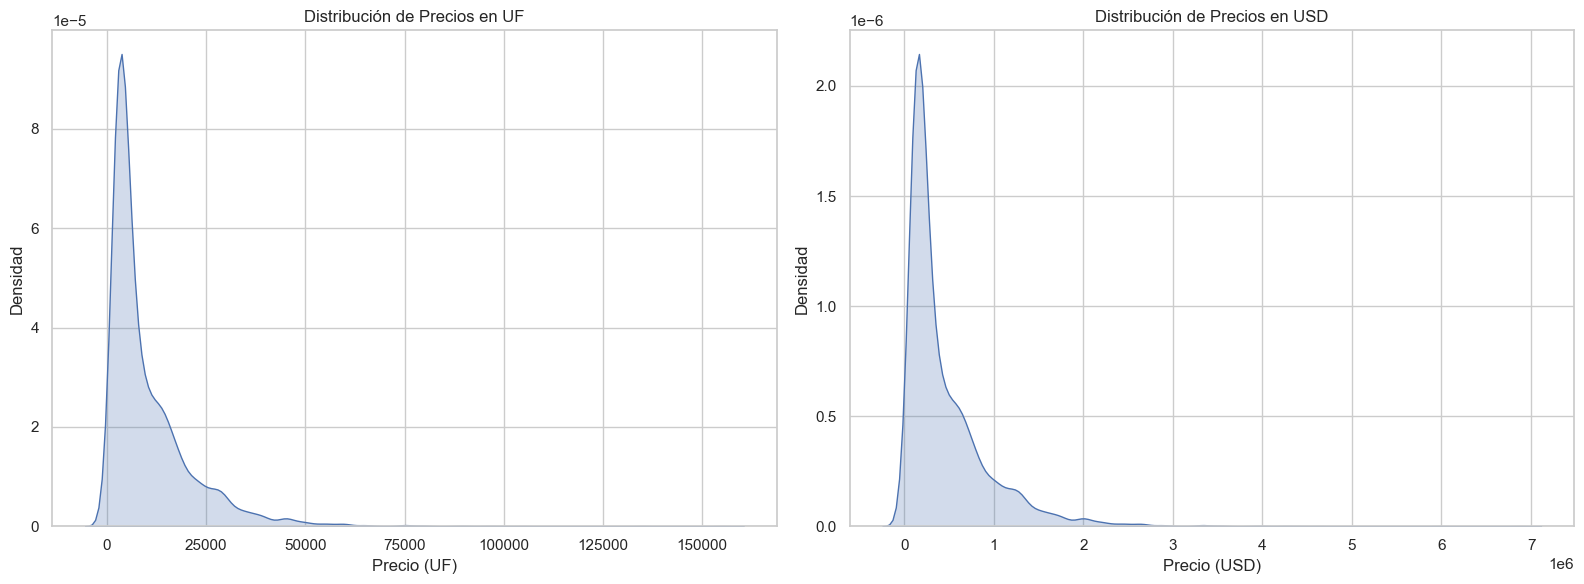

In [39]:
# Configura el tamaño general de la figura
plt.figure(figsize=(16, 6))

# Gráfico para la UF
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
sns.kdeplot(df['Price_UF'], label='UF', fill=True)
plt.title('Distribución de Precios en UF')
plt.xlabel('Precio (UF)')
plt.ylabel('Densidad')

# Gráfico para el USD
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.kdeplot(df['Price_USD'], label='USD', fill=True)
plt.title('Distribución de Precios en USD')
plt.xlabel('Precio (USD)')
plt.ylabel('Densidad')

# Ajusta automáticamente el layout de los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


 Las distribuciones de precios en Unidad de Fomento (UF) y en dólares estadounidenses (USD) son muy parecidas, esto puede indicar varias cosas:
 1. Correlación Fuerte entre UF y USD en el Mercado Inmobiliario
 2. Estabilidad del Tipo de Cambio
 3. Consistencia en la Política de Precios
 4. Homogeneidad del Mercado

### 6. ¿Influye el corredor de bienes raíces en el precio de venta de una propiedad?

Para analizar el rol del corredor de bienes raíces en el precio de las propiedades, podemos usar gráficos de caja (boxplots) que nos permitirán comparar las distribuciones de precios asociadas a cada corredor de bienes raíces

In [40]:
# Contamos cuántas propiedades tiene listadas cada corredor y obtenemos el top 10
top_realtors = df['Realtor'].value_counts().head(10).index
# Filtramos el DataFrame para quedarnos solo con las filas del top 10 de corredores
df_top_realtors = df[df['Realtor'].isin(top_realtors)]



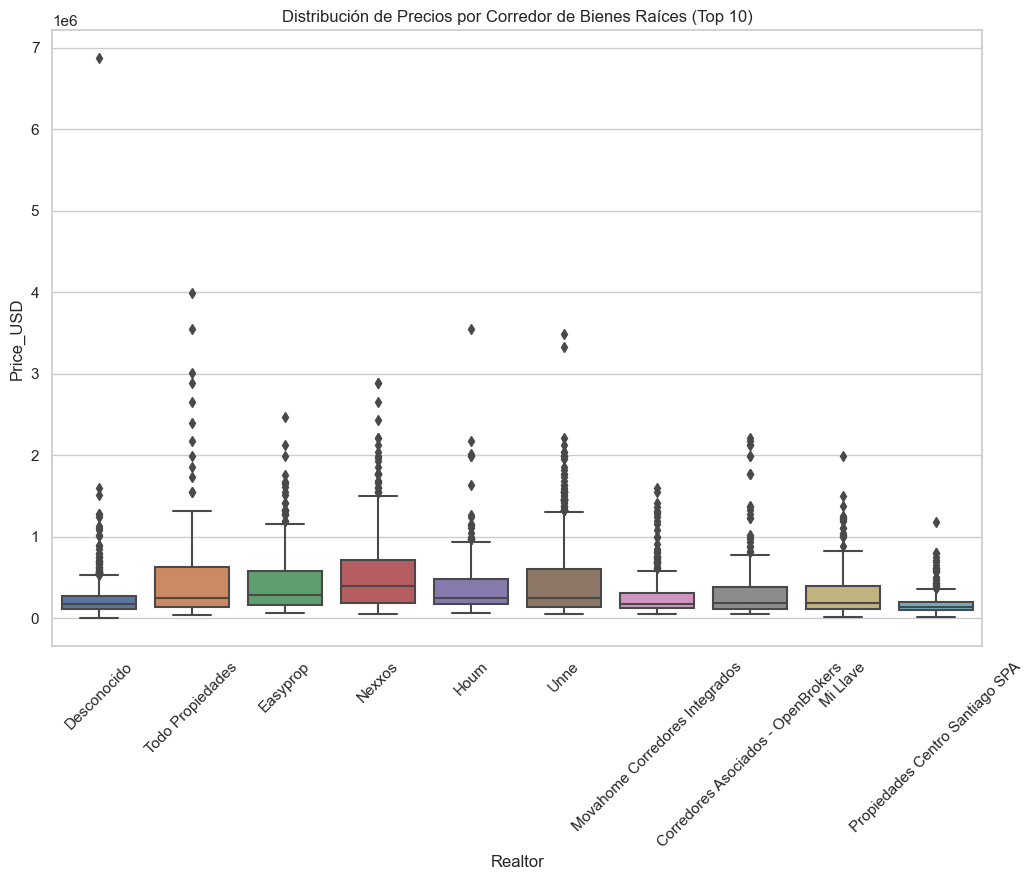

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Realtor', y='Price_USD', data=df_top_realtors)
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Corredor de Bienes Raíces (Top 10)')
plt.show()


Filtramos los datos

In [42]:
# Establecer cuantiles para los límites
lower_quantile = 0.01  # 1% para límite inferior
upper_quantile = 0.99  # 99% para límite superior

# Calcular los cuantiles para el precio
lower_limit = df_top_realtors['Price_USD'].quantile(lower_quantile)
upper_limit = df_top_realtors['Price_USD'].quantile(upper_quantile)

# Filtrar el DataFrame para remover los datos extremos en precio
df_filtered = df_top_realtors[(df_top_realtors['Price_USD'] >= lower_limit) & (df_top_realtors['Price_USD'] <= upper_limit)]



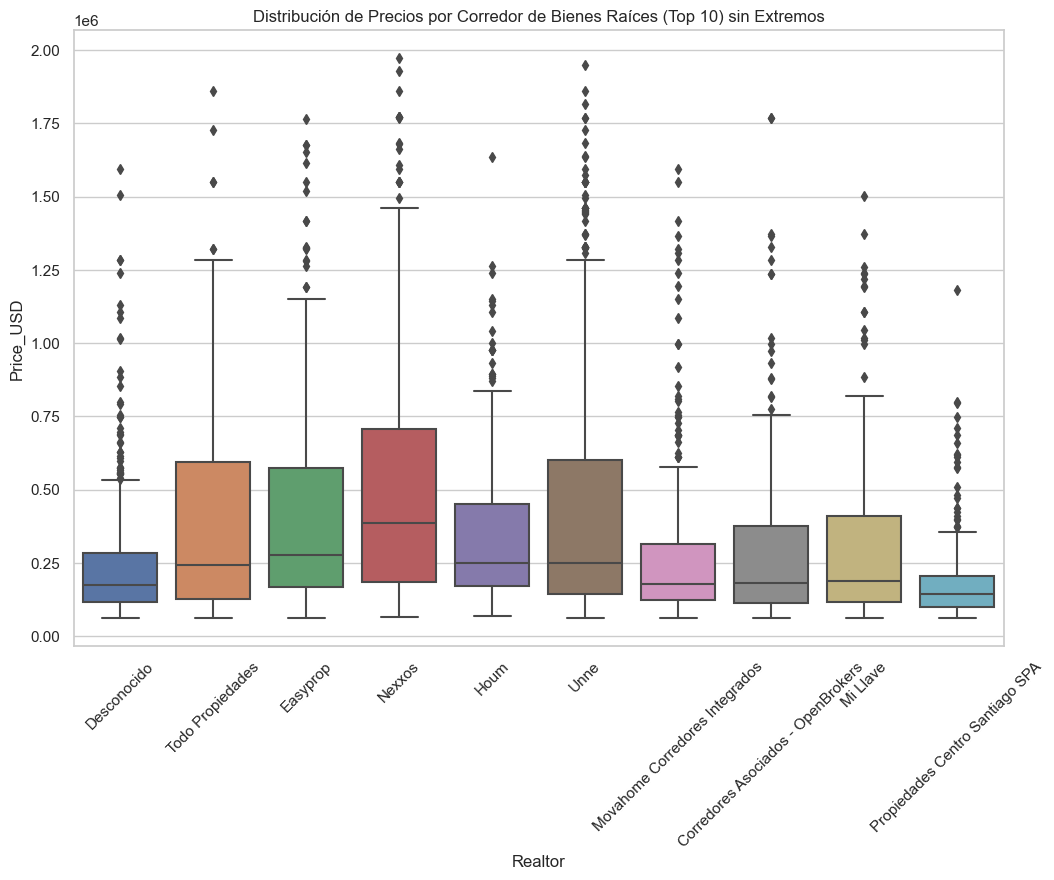

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Realtor', y='Price_USD', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Corredor de Bienes Raíces (Top 10) sin Extremos')
plt.show()


Tambien realizamos un Violin plot ya que puede dar una mejor idea de la densidad de los precios de las propiedades manejadas por cada corredor.

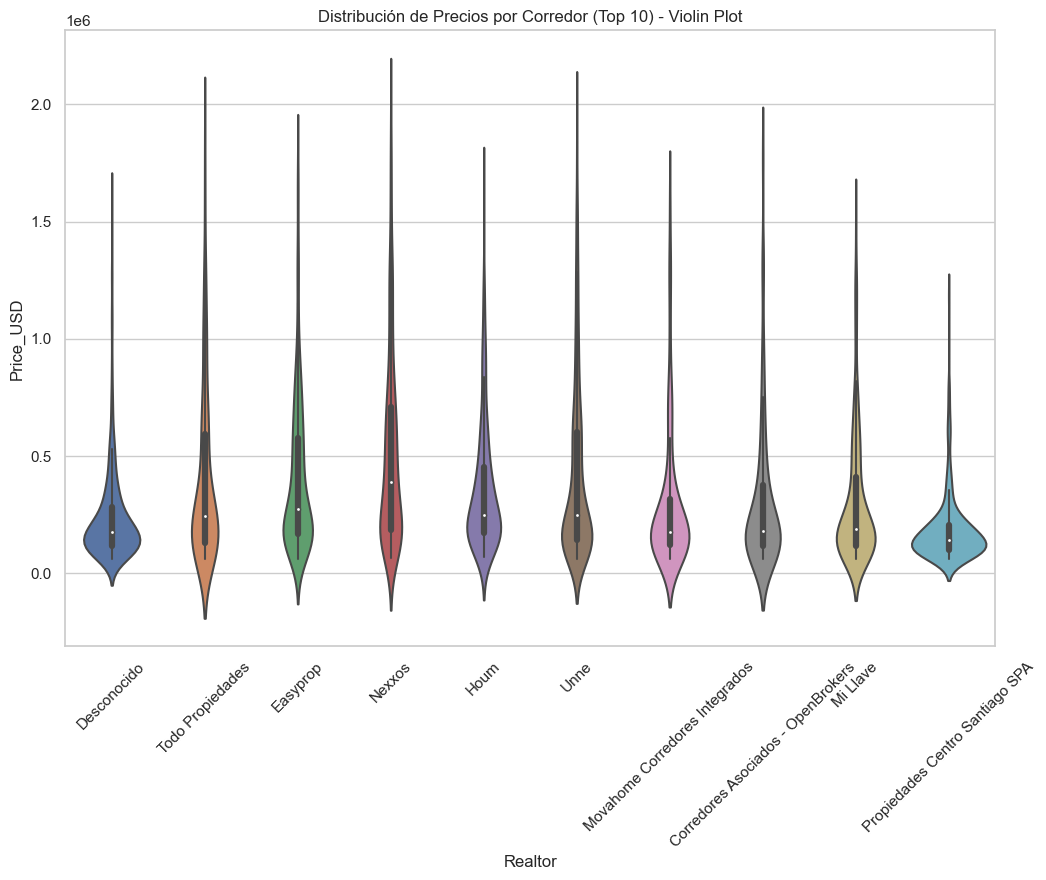

In [44]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Realtor', y='Price_USD', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Corredor (Top 10) - Violin Plot')
plt.show()


Hay poca variación entre los diferentes corredores.

### v) Reduccion de dimensiones

**Escalado de datos usando "MinMaxScaler"**

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Definimos las columnas a escalar
# Excluimos 'Price_UF' y 'Price_USD' de la escala y seleccionamos las numéricas
columns_to_scale = ['Dorms', 'Baths', 'Built Area', 'Total Area', 'Parking']

# Creamos una instancia del escalador
scaler = MinMaxScaler()

# Escalamos las características seleccionadas
df_scaled = df.copy()  # Creamos una copia para mantener el DataFrame original intacto
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Ahora df_scaled contiene las columnas escaladas junto con las columnas originales no numéricas y los precios



**Aplicamos PCA (Análisis de Componentes Principales)**

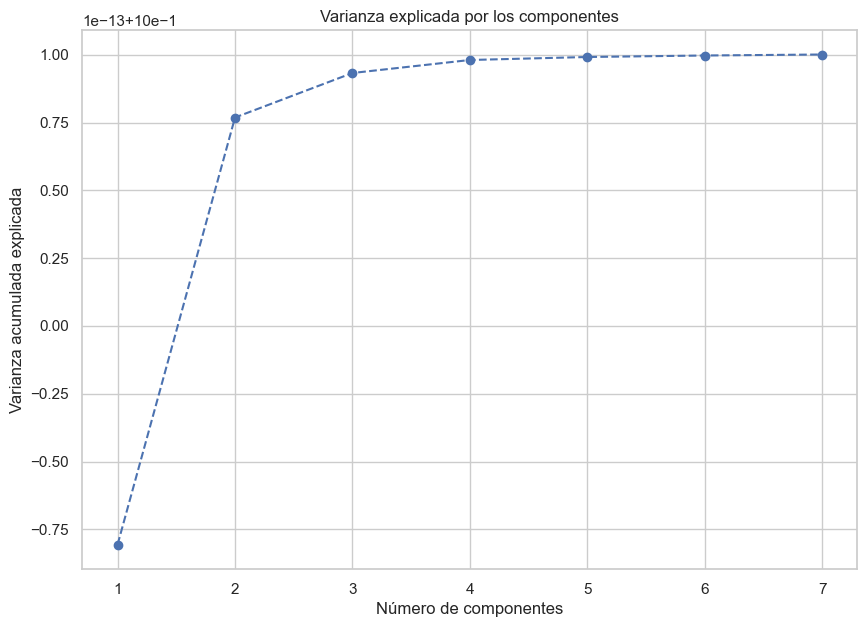

In [46]:
# Excluimos columnas categóricas
columnas_numericas = ['Price_UF', 'Price_USD', 'Dorms', 'Baths', 'Built Area', 'Total Area', 'Parking']

# Creamos un nuevo DataFrame solo con las columnas numéricas
df_scaled_numeric = df_scaled[columnas_numericas]

# Aplicamos PCA sobre df_scaled_numeric
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Varianza explicada sin especificar n_components inicialmente
pca = PCA()
df_pca = pca.fit_transform(df_scaled_numeric)

# Visualizamos la varianza explicada
plt.figure(figsize=(10, 7))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza explicada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()



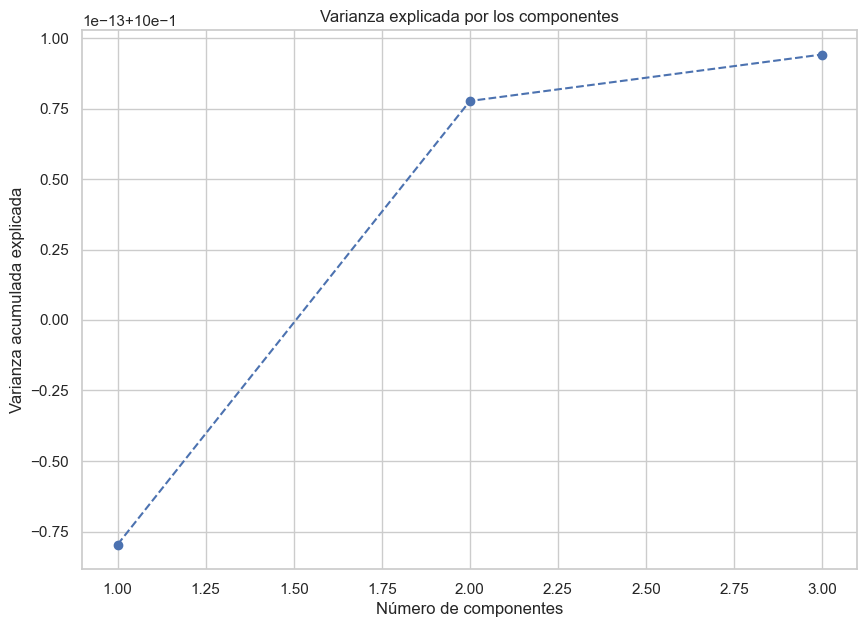

In [47]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled_numeric)

# Visualizamos la varianza explicada
plt.figure(figsize=(10, 7))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza explicada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()


In [48]:
# Convertimos df_pca en un DataFrame de pandas
componentes_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])

# Primeras filas del DataFrame de componentes PCA
print(componentes_pca.head())


             PC1       PC2       PC3
0   56589.248387  0.008967  0.120853
1 -322442.197175  0.286949 -0.068495
2 -293637.862277  0.019251 -0.037988
3 -359811.706792  0.351421 -0.030781
4 -387216.675830  0.184188 -0.064271


### vi) Algoritmos de Regresion

**Al realizar hipotesis y preguntas de interes centradas en predecir el valor futuro de las propiedades creo que utilizar algoritmos de regresion es la mejor decision**

**Realizamos una Regresion lineal multiple incluyendo las variables no numericas y obtenemos metricas**

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error


# Seleccionamos las columnas categóricas
categorical_features = ['Comuna', 'Ubicacion', 'Realtor'] 

# Creamos el transformador con OneHotEncoder para las variables categóricas
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)], 
    remainder='passthrough')

# Preparamos las variables explicativas X y la variable objetivo y
X = df.drop('Price_USD', axis=1)
y = df['Price_USD']

# Aplicamos el preprocesamiento: codificación One-Hot
X_processed = preprocessor.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Inicializamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MAE: 6.378399774569983
MSE: 92.35903243782317
RMSE: 9.610360681983959
R^2: 0.999999999608357


**Tanto el MAE (error absoluto medio) como el RMSE(Raiz del error cuadratico medio) indican que hay variabilidad en los errores de predicción del modelo, posiblemente debido a algunos errores de predicción significativamente grandes.**

**Mientras que el R2 (coeficiente de determinacion o correlacion) Este valor es alto, muy cercano a 1, lo que indica que el modelo explica prácticamente toda la variabilidad de los datos con respecto a la media. Sin embargo, un valor tan cercano a 1, especialmente en datos reales, podría ser indicativo de sobreajuste, donde el modelo está capturando el "ruido" en los datos de entrenamiento en lugar de las relaciones subyacentes verdaderas.**
